

## Бустинг Практика

### <b><span style='color:#3489c2'>Предсказания Стоимости Дома</span></b>


#### **Данные из Бостона**

В следующих заданиях будет использоваться датасет boston из `sklearn.datasets`

Оставьте последние **25% объектов для контроля качества** (тестовая выборка)
- Разделив X и y на X_train, y_train и X_test, y_test с помощью train_test_split(X, y, train_size = 0.75, shuffle=False)

#### **Цель Задания**

- реализовать простой вариант **градиентного бустинга** 
- над регрессиоными деревьями для случая **квадратичной функции потерь**

In [1]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm 
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid')

boston_data = datasets.load_boston()

data = load_boston()
features, target = data.data, data.target

# Разделяем нашу выборку
X_train, X_test, y_train, y_test = train_test_split(features,target,
                                                    train_size=0.75,
                                                    shuffle=False)

#### **Бустинг**

- Это метод **построения композиций базовых алгоритмов** 
- С помощью **последовательного добавления** к текущей композиции нового алгоритма
- С некоторым коэффициентом (коэффийиент из градиентного спуска)

#### **Градиентный Бустинг**

Обучает каждый новый алгоритм так чтобы он
- **приближал антиградиент ошибки** по ответам композиции на обучающей выборке

Аналогично минимизации функций методом **градиентного спуска**, 
- в градиентном бустинге мы подправляем композицию, **изменяя алгоритм в направлении антиградиента ошибки**

### <b><span style='color:#686dec'>Задание</span></b>

#### <b>Задание <span style='color:#686dec'>6.4.1</span></b> 

Воспользуйтесь формулой из лекций, задающей ответы на обучающей выборке, на которые нужно обучать новый алгоритм (фактически это лишь чуть более подробно расписанный градиент от ошибки), и получите частный ее случай, если функция потерь  - квадрат отклонения ответа композиции  от правильного ответа  на данном .

Если вы давно не считали производную самостоятельно, вам поможет таблица производных элементарных функций (которую несложно найти в интернете) и правило дифференцирования сложной функции. После дифференцирования квадрата у вас возникнет множитель  — т.к. нам всё равно предстоит выбирать коэффициент, с которым будет добавлен новый базовый алгоритм, проигноируйте этот множитель при дальнейшем построении алгоритма.

Запишите в качестве ответа формулу производной без константы

(a(x)-y)*a’(x)



#### <b>Задание <span style='color:#686dec'>6.4.2</span></b> 

- Заведите массив для объектов `DecisionTreeRegressor` ( Наш базовый алгоритм )
- И для вещественных чисел ( будут коэффициенты перед базовым алгоритмами )

В цикле обучите:

- Последовательно 20 решающих деревьев (`max_depth=5` и`random_state=139`)
- В бустинге зачастую используются сотни и тысячи деревьев, ограничимся 50
- Каждое дерево должно обучаться на одном и том же множестве объектов, но ответы, которые учится прогнозировать дерево, будут меняться в соответствие с полученным в задании 1 правилом (коэффициент (`coeff`) равным 0.9)

- Обычно оправдано выбирать коэффициент значительно меньшим - порядка 0.05 или 0.1, но т.к. в нашем учебном примере на стандартном датасете будет всего 50 деревьев, возьмем для начала шаг побольше

In [2]:
# вычислять прогноз построенной на данный момент композиции деревьев на выборке X `gbm_predict`
import tqdm.notebook as tqdm

def gbm_predict(features,algos,coeffs): 
    
    lst_sum = []
    
    # for each row
    for feature in features:
        
        tlst_sum = []
        # for all models, predict + add component
        for algo,coeff in zip(lst_algo,lst_coeff):
            ym_pred = coeff*algo.predict([feature])[0]
            tlst_sum.append(ym_pred)
            
        value = sum(tlst_sum)
        lst_sum.append(value)
            
    return lst_sum

def Loss(y, z):
    return (z - y)

In [3]:
from sklearn import datasets
from tqdm import tqdm
import numpy as np
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn import metrics

boston_data = datasets.load_boston()
X = boston_data.data
y = boston_data.target

# Разбиваем на тренировочную и тестовую выборку
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.75,
                                                    shuffle=True)

print('training size: ',X_train.shape)
print('test size:',X_test.shape)

training size:  (379, 13)
test size: (127, 13)


In [4]:
'''

Реализуем Градиентный Бустинг (Константы одинаковые)

'''

lst_algo = []; lst_coeff = []
y_curr = np.array(y_train)   # начальная разница (y_train - 0)

# lst_algo все время добавляется

iters = 20
for i in tqdm(range(iters)):
    
    # Shallow Decision Tree Regressor
    regressor = DTR(max_depth=5,
                    random_state=139)
    regressor.fit(X_train, y_curr)
    y_pred = gbm_predict(X_train,lst_algo,lst_coeff)
    y_curr = Loss(y_pred, y_train)  # разница (y_train - y_pred)
    
    # каждую итерацию добавляем 
    lst_algo.append(regressor)
    lst_coeff.append(0.9)      # 0.9 константа

100%|██████████| 20/20 [00:01<00:00, 10.39it/s]


In [5]:
# predict for X_test (all rows)
y_pred = gbm_predict(X_test,lst_algo,lst_coeff)
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f'rmse: {rmse:.3f} mse: {mse:.3f}')

rmse: 5.146 mse: 26.481


#### <b>Задание <span style='color:#686dec'>6.4.3</span></b> 

Вас может также беспокоить, что двигаясь с постоянным шагом, вблизи минимума ошибки ответы на обучающей выборке меняются слишком резко, перескакивая через минимум.

Попробуйте уменьшать **вес перед каждым алгоритмом** с каждой следующей итерацией по формуле 0.9 / (1.0 + iter), где iter - номер итерации (от 0 до 0.49)



In [6]:
'''

Реализуем Градиентный Бустинг
Константы меняются по формуле

'''

lst_algo = []
lst_coeff = []
y_curr = np.array(y_train)
print('training...')
for iter in tqdm(range(50)):
    
    regressor = DTR(max_depth=5,random_state=139)
    regressor.fit(X_train, y_curr)
    lst_algo.append(regressor)
    lst_coeff.append(0.9/(1.0+iter))    
    y_pred = gbm_predict(X_train,lst_algo,lst_coeff)
    y_curr = Loss(y_pred, y_train)
  
print('prediction...')
y_pred = gbm_predict(X_test,lst_algo,lst_coeff)
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f'rmse: {rmse:.3f},mse: {mse:.3f}')

training...


100%|██████████| 50/50 [00:13<00:00,  3.72it/s]

prediction...
rmse: 3.058,mse: 9.354


#### <b>Задание <span style='color:#686dec'>6.4.4</span></b> 

- Реализованный вами метод - `градиентный бустинг` над деревьями - очень популярен
- Он представлен как в самой библиотеке sklearn, так и в сторонней библиотеке XGBoost...
- На практике `XGBoost` работает заметно лучше `GradientBoostingRegressor`


Исследуйте
- Переобучается ли градиентный бустинг с ростом `числа итераций` (и подумайте, почему)
- а также с ростом `глубины` деревьев
- На основе наблюдений выберите правильные утверждения из приведенных ниже:

In [7]:
'''
Градиентный Бустинг из sklearn
'''

from sklearn.ensemble import GradientBoostingRegressor as GBR

# параметры
# loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', 
# min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
# init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, 
# validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0

n_estimators = [i for i in range(1,1000,50)]

lst_mse_train = []; lst_mse_test = []
for estimators in tqdm(n_estimators):
    model = GBR(n_estimators=estimators)
    model.fit(X_train,y_train)
    ym_train = model.predict(X_train)
    ym_test = model.predict(X_test)
    mse_train = metrics.mean_squared_error(y_train,ym_train)
    mse_test = metrics.mean_squared_error(y_test,ym_test)
    lst_mse_train.append(mse_train); lst_mse_test.append(mse_test)

100%|██████████| 20/20 [00:05<00:00,  3.49it/s]


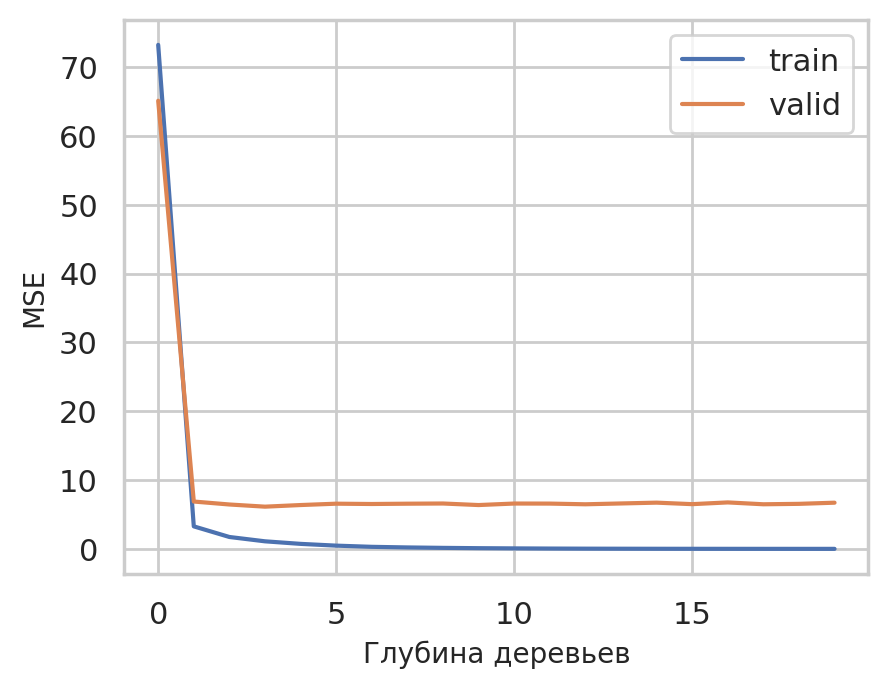

In [8]:
fig, ax = plt.subplots()
ax.plot(lst_mse_train,label='train')
ax.plot(lst_mse_test,label='valid')
ax.legend()
ax.set_xlabel('Глубина деревьев',size=10)
ax.set_ylabel('MSE',size=10)
plt.show()

#### Проверенное утверждение

С увеличением числа деревьев, начиная с некоторого момента, градиентный бустинг начинает переобучаться.

100%|██████████| 49/49 [00:08<00:00,  5.76it/s]


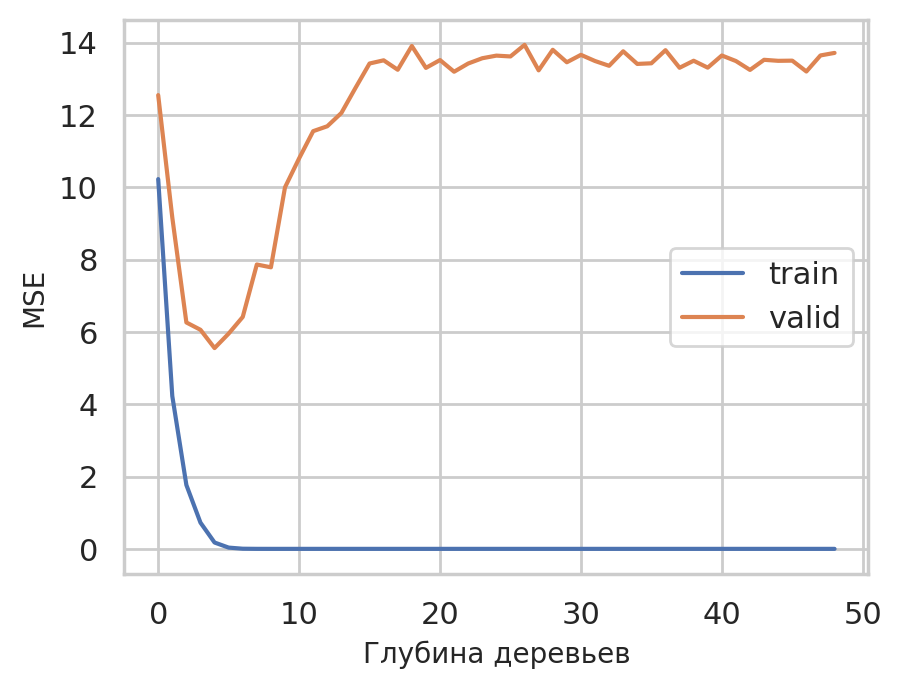

In [9]:
n_depth = [i for i in range(1,50,1)]

lst_mse_train = []; lst_mse_test = []
for depth in tqdm(n_depth):

    model = GBR(max_depth=depth)
    model.fit(X_train,y_train)
    ym_train = model.predict(X_train)
    ym_test = model.predict(X_test)
    mse_train = metrics.mean_squared_error(y_train,ym_train)
    mse_test = metrics.mean_squared_error(y_test,ym_test)
    lst_mse_train.append(mse_train)
    lst_mse_test.append(mse_test)

fig, ax = plt.subplots()
ax.plot(lst_mse_train,label='train')
ax.plot(lst_mse_test,label='valid')
ax.legend()
ax.set_xlabel('Глубина деревьев',size=10)
ax.set_ylabel('MSE',size=10)
plt.show()

#### Проверенное утверждение

С ростом глубины деревьев, начиная с некоторого момента, качество работы градиентного бустинга на тестовой выборке начинает ухудшаться.

100%|██████████| 49/49 [00:08<00:00,  5.89it/s]


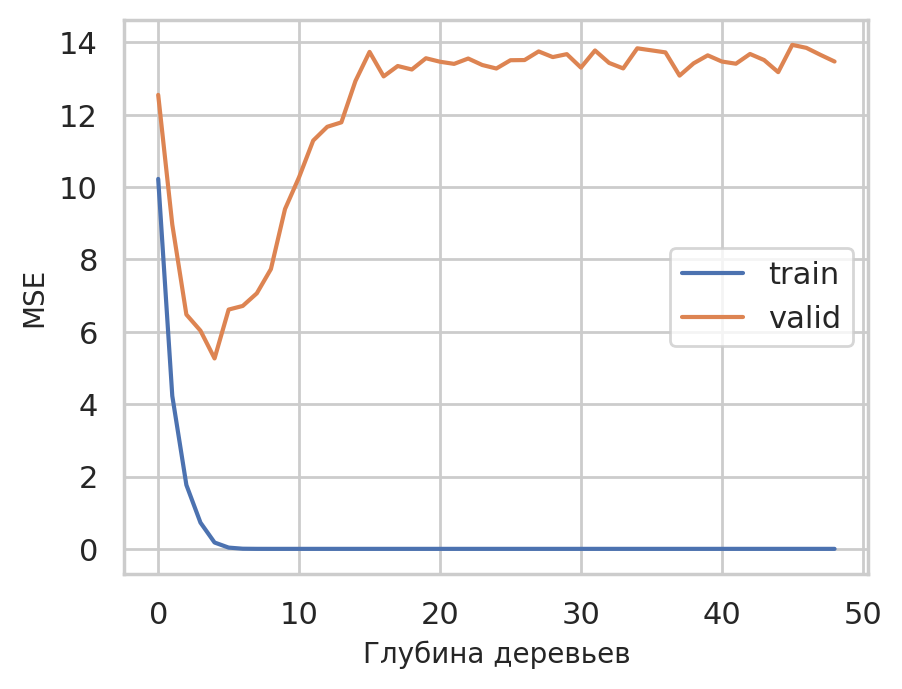

In [10]:
n_depth = [i for i in range(1,50,1)]

lst_mse_train = []; lst_mse_test = []
for depth in tqdm(n_depth):

    model = GBR(max_depth=depth)
    model.fit(X_train,y_train)
    ym_train = model.predict(X_train)
    ym_test = model.predict(X_test)
    mse_train = metrics.mean_squared_error(y_train,ym_train)
    mse_test = metrics.mean_squared_error(y_test,ym_test)
    lst_mse_train.append(mse_train)
    lst_mse_test.append(mse_test)

fig, ax = plt.subplots()
ax.plot(lst_mse_train,label='train')
ax.plot(lst_mse_test,label='valid')
ax.legend()
ax.set_xlabel('Глубина деревьев',size=10)
ax.set_ylabel('MSE',size=10)
plt.show()

#### Проверенное утверждение

- С увеличением числа деревьев, начиная с некоторого момента, градиентный бустинг начинает переобучаться.
- С ростом глубины деревьев, начиная с некоторого момента, качество работы градиентного бустинга на тестовой выборке начинает ухудшаться.

#### <b>Задание <span style='color:#686dec'>6.4.5</span></b> 

- Сравните получаемое с помощью градиентного бустинга качество с качеством работы `линейной регресии`
- Для этого обучите `LinearRegression` (с параметрами по умолчанию) на обучающей выборке и оцените для прогнозов полученного алгоритма на тестовой выборке `RMSE`
- В данном примере качество работы простой модели должно было оказаться хуже, но не стоит забывать, что так бывает не всегда

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() #Обозначаем, что наша модель - линейная регрессия=
model.fit(X_train,y_train) #обучаем модель на обучающих данных
ym_test = model.predict(X_test)
mse = metrics.mean_squared_error(y_test,ym_test)
rmse = np.sqrt(mse)
print(f'rmse: {rmse:.3f},mse: {mse:.3f}')

rmse: 4.822,mse: 23.253
